<a href="https://colab.research.google.com/github/saradnyam/customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[786 251]
 [156 873]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1037
           1       0.78      0.85      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



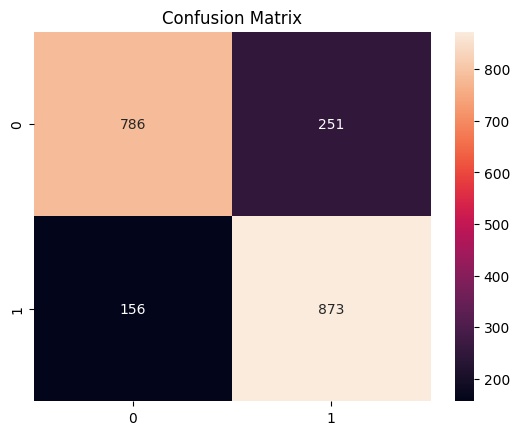

In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import os

# Step 2: Load & preprocess dataset
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Step 3: Encode categorical features
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 4: Split & scale data
X = df.drop('Churn', axis=1)
y = df['Churn']
X, y = SMOTE().fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Visualizations
# Create the directory if it doesn't exist
if not os.path.exists('visuals'):
    os.makedirs('visuals')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig("visuals/confusion_matrix.png")